# Modelación y simulación en Python

Modelación


### Importando modsim

La siguiente celda importa `modsim`, la cual es una colección de funciones. Hace dos cosas:

1.  Usa un "comando mágico" para especificar si las figuras deberían aparecer en el cuaderno o aparecer en una nueva ventana.

2.  Importa todo lo definido en `modsim`.

Seleccione la siguiente celda y presione SHIFT-ENTER para correrla.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

print('Si esta celda corre exitosamente, mostrará solamente este mensaje.')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
modsim.py depends on Python 3.6 features.


Si esta celda corre exitosamente, mostrará solamente este mensaje.


## El mito del centavo

`modsim` define `UNITS`, la cual contiene variables que representan cada unidad existente.  Las siguientes líneas crean nuevas variables llamadas `meter` y `second` (Unidades de Pint).

In [3]:
meter = UNITS.meter
second = UNITS.second

Para averiguar qué unidades están definidas, escriba 'UNITS'. (incluido el punto) en la celda siguiente y luego presione TAB. Debería ver un menú emergente con una lista de unidades.

Crea una variable llamada 'a' y muestre su valor:

In [4]:
a = 9.8 * meter / second**2
a

<Quantity(9.8, 'meter / second ** 2')>

Crea 't' y visualiza su valor:

In [5]:
t = 4 * second
t

<Quantity(4, 'second')>

Si crea una variable y no muestra el valor, no obtendrá ningún resultado:

In [6]:
h = a * t**2 / 2
h

<Quantity(78.4, 'meter')>

Agregue una segunda línea a la celda anterior para mostrar el valor de `h`.

Ahora solucionemos el problema de la caída del centavo. Las siguientes líneas establecen `h` a la altura del edificio del Empire State y calculan el tiempo que tardaría un centavo en caer, suponiendo una aceleración constante.


In [7]:
h = 381 * meter
t = sqrt(2 * h / a)
t

<Quantity(8.817885349720552, 'second')>

Dado 't', podemos calcular la velocidad del centavo cuando aterriza.

In [8]:
v = a * t
v

<Quantity(86.41527642726142, 'meter / second')>

Podemos convertir de un conjunto de unidades a otro asi:

In [9]:
mile = UNITS.mile
hour= UNITS.hour

In [10]:
v.to(mile/hour)

<Quantity(193.30546802805438, 'mile / hour')>

In [21]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/PHxvMLoKRWg" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


**Ejercicio**:
En realidad, la resistencia del aire evita que el centavo alcance esta velocidad. Aproximadamente a unos 20 metros por segundo, la fuerza de la resistencia del aire es igual a la fuerza de la gravedad y el centavo deja de acelerarse.

Como simplificación, supongamos que la aceleración del centavo es "a" hasta que el centavo alcance los 20 metros por segundo, y despues 0. ¿Cuál es el tiempo total para que el centavo caiga 381 metros?


Solución:

Empezaremos por obtener las unidades que necesitaremos de Pint.

In [11]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

Y definiendo el estado inicial.

In [12]:
init = State(y=381 * m, 
             v=0 * m/s)
init

,value
v,0.0 meter / second
y,381 meter


La aceleración debida a la gravedad es de aproximadamente 9.8 m / s $ ^ 2 $

In [13]:
g = 9.8 * m/s**2

Cuando llamamos a odeint (investigar que es oident y que es linspace), necesitamos una lista de marcas de tiempo donde queremos calcular la solución.

Comenzaremos con una duración de 10 segundos.

In [21]:
import numpy as np


duration = 10 * s
#ts = np.linspace(0, duration, 11)
ts = np.linspace(0, 10, 11)
ts

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

Ahora hacemos un objeto como Sistema.

In [22]:
system = System(init=init, g=g, ts=ts)

Y se define la función de pendiente.

In [23]:
def slope_func(state, t, system):
    """Calcula derivados del estado.
    
     estado: posición, velocidad
     t: tiempo
     sistema: objeto del sistema que contiene `g`
    
     devoluciones: derivadas de y & v
    """
    y, v = state
    unpack(system)    

    dydt = v
    dvdt = -g
    
    return dydt, dvdt

Siempre es una buena idea probar la función de pendiente con las condiciones iniciales.

In [24]:
dydt, dvdt = slope_func(init, 0, system)
print(dydt)
print(dvdt)

381 meter
-9.8 meter / second ** 2


Ahora estamos listos para ejecutar odeint

In [25]:
run_odeint(system, slope_func)

Así es como se ven los resultados.

In [26]:
system.results.head()

,v,y
0.0,0.0,381.0
1.0,376.1,371.2
2.0,742.4,361.4
3.0,1098.9,351.6
4.0,1445.6,341.8


In [27]:
system.results.tail()

,v,y
6.0,2109.6,322.2
7.0,2426.9,312.4
8.0,2734.4,302.6
9.0,3032.1,292.8
10.0,3320.0,283.0


La siguiente función traza los resultados.

In [28]:


def plot_position(results):
    """Traza los resultados.
    
     resultados: DataFrame con posición, `y`
    """
    newfig()
    plot(results.y, label='y')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')

Así se ve

<IPython.core.display.Javascript object>


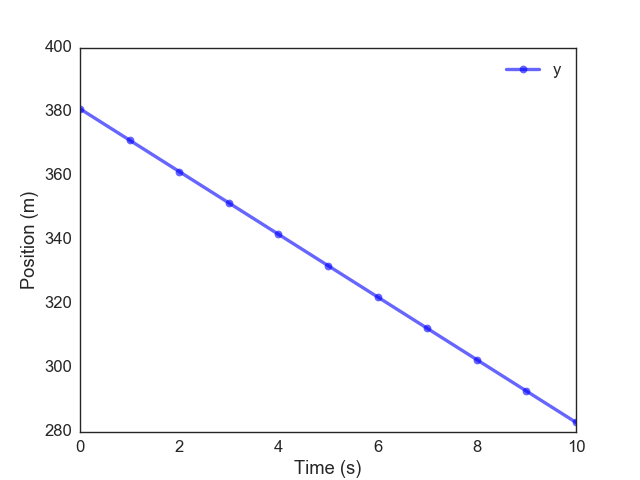

In [29]:
plot_position(system.results)
#savefig('mit_cent-fig01.pdf')

Ejercicio: agregue una instrucción de impresión a slope_func para imprimir el valor de t cada vez que se llame. ¿Qué podemos inferir sobre cómo funciona odeint, en función de los resultados?

In [30]:

def slope_func(state, t, system):
    """Calcular derivados del estado.
    
     estado: posición, velocidad
     t: tiempo
     sistema: objeto del sistema que contiene `g`
    
     devoluciones: derivadas de y & v
    """
    y, v = state
    unpack(system)    

    dydt = v
    dvdt = -g
    
    return dydt, dvdt
print (t)

8.817885349720552 second


En el pavimento:
Aquí está el código nuevamente para configurar el objeto del Sistema.

In [31]:
def make_system(duration, v_init=0):
    """Haz un objeto de sistema.
    
     duración: tiempo de simulación en segundos
     v_init: velocidad inicial, sin dimensiones
    
     devoluciones: objeto del sistema
    """
    init = State(y=381 * m, v=v_init * m / s)

    g = 9.8 * m/s**2
    #ts = linspace(0, duration, 11)
    ts = linspace(0, 10, 11)
    return System(init=init, g=g, ts=ts)

Corremos la simulación

In [32]:

system = make_system(10)
run_odeint(system, slope_func)
system.results

,v,y
0.0,0.0,381.0
1.0,376.1,371.2
2.0,742.4,361.4
3.0,1098.9,351.6
4.0,1445.6,341.8
5.0,1782.5,332.0
6.0,2109.6,322.2
7.0,2426.9,312.4
8.0,2734.4,302.6
9.0,3032.1,292.8


Para saber cuándo el centavo golpea la acera, usamos interp_inverse, que devuelve una función que se asigna de altura en altura

In [33]:
y = system.results.y
T = interp_inverse(y, kind='cubic')

AttributeError: 'Float64Index' object has no attribute 'isnull'

T (0) interpola el tiempo cuando la altura era 0.

In [42]:
T_sidewalk = T(0)
T_sidewalk

NameError: name 'T' is not defined

In [1]:
# Solution

duration = 10
vs = linrange(0, 25, 1)

for v_init in vs:
    system = make_system(20, v_init)
    run_odeint(system, slope_func)
    y = system.results.y
    inverse = Series(y.index, index=y.values)
    T = interpolate(inverse, kind='cubic')
    T_sidewalk = T(0)
    plot(v_init, T_sidewalk, 'b-')

NameError: name 'linrange' is not defined

# SOLUCIÓN:

Con resistencia del aire

Ecuación de arrastre o fuerza de rozamiento

Primero crearemos un objeto Condition para contener las cantidades que necesitaremos.



In [30]:
condition = Condition(height = 381 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 2.5e-3 * kg,
                      diameter = 19e-3 * m,
                      rho = 1.2 * kg/m**3,
                      v_term = 18 * m / s,
                      duration = 30 * s)

Ahora aquí hay una versión de make_system que toma un objeto Condition como parámetro.

make_system usa el valor dado de v_term para calcular el coeficiente de arrastre C_d.

In [33]:
def make_system(condition):
    """Hace un objeto como sistema para las condiciones dadas.
    
     condición: Condición con altura, g, masa, diámetro,
                rho=densidad, v_term y duración
    
     devuelve: Sistema con init, g, masa, rho, C_d, área y ts
    """
    unpack(condition)
    
    init = State(y=height, v=v_init)
    area = np.pi * (diameter/2)**2
    C_d = 2 * mass * g / (rho * area * v_term**2)
    #duration = 30 * s
    #ts = linspace(0, duration, 101)
    ts = linspace(0, 30, 101)
    
    return System(init=init, g=g, mass=mass, rho=rho,
                  C_d=C_d, area=area, ts=ts)

Hagamos un Sistema

In [34]:
system = make_system(condition)
system

,value
ts,"[0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, ..."
area,0.0002835287369864788 meter ** 2
rho,1.2 kilogram / meter ** 3
C_d,0.4445009981135434 dimensionless
g,9.8 meter / second ** 2
init,y 381 meter v 0.0 meter / secon...
mass,0.0025 kilogram


Aquí está la función de pendiente, incluida la aceleración debido a la gravedad y la resistencia.

In [35]:
def slope_func(state, t, system):
    """Calcular derivados del estado.
    
     estado: posición, velocidad
     t: tiempo
     sistema: objeto del sistema que contiene g, rho,
             C_d, área y masa
    
     devoluciones: derivadas de y & v
    """
    y, v = state
    unpack(system)
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    
    return dydt, dvdt

Se prueba la función de pendiente con las condiciones iniciales

In [36]:
slope_func(system.init, 0, system)

(<Quantity(0.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)

Y luego ejecutamos la simulación.

In [37]:
run_odeint(system, slope_func)

Primero comprobamos que la simulación haya corrido el tiempo suficiente para que caiga el centavo.

In [40]:
def final_state(results):
    """Devuelve la posición y velocidad final, con unidades.
    
     resultados: TimeFrame con y & v.
    
     devuelve: y, v en t_end
    """
    t_end = results.index[-1]
    y, v = results.loc[t_end]
    return y*m, v*m/s
    
final_state(system.results)

(<Quantity(-136.083704279796, 'meter')>,
 <Quantity(-18.00000000087864, 'meter / second')>)

Luego se calcula el tiempo de vuelo.

In [42]:
y = system.results.y
inverse = Series(y.index, index=y.values)
T = interpolate(inverse, kind='cubic')
T_sidewalk = T(0)
T_sidewalk

AttributeError: 'Float64Index' object has no attribute 'isnull'

Configurando la duración al tiempo de vuelo calculado, podemos verificar las condiciones finales.

In [43]:
condition.set(duration=T_sidewalk)
system = make_system(condition)
run_odeint(system, slope_func)
y_final, v_final = final_state(system.results)

NameError: name 'T_sidewalk' is not defined

La altura final es cercana a 0, como se esperaba. Y la velocidad final es cercana a la velocidad terminal dada.

In [44]:
y_final, v_final

NameError: name 'y_final' is not defined

Aquí está la trama de posición como una función del tiempo

In [45]:
plot_position(system.results)
savefig('trama_pos_fun_tiempo-fig02.pdf')

NameError: name 'plot_position' is not defined

Y la velocidad como una función del tiempo:

In [ ]:
def plot_velocity(results):
    """Plot the results.
    
    results: DataFrame with velocity, v
    """
    newfig()
    plot(results.v, label='v')
        
    decorate(xlabel='Time (s)',
             ylabel='Velocity (m/2)')

In [46]:
plot_velocity(system.results)

NameError: name 'plot_velocity' is not defined

A partir de una velocidad inicial de 0, el centavo se acelera hacia abajo hasta que alcanza la velocidad terminal; después de eso, la velocidad es constante.

#Hasta aqui

In [57]:
y_final, v_final = final_state(system.results)
y_final

<Quantity(-136.083704279796, 'meter')>

Y podemos verificar la velocidad final.

In [58]:
v_final

<Quantity(-18.00000000087864, 'meter / second')>

Y convertir a km / h

In [59]:
km = UNITS.kilometer
h = UNITS.hour
v_final.to(km / h)

<Quantity(-64.8000000031631, 'kilometer / hour')>

Si no hubiera resistencia al aire, el centavo golpearía la acera (o la cabeza de alguien) a más de 300 km / h.

Entonces, es bueno que haya resistencia al aire.